In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Daily Household Transactions.csv')
df.dropna(subset=['Amount'], inplace=True)

In [3]:
df.shape

(2461, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [5]:
X = df.iloc[:, [5]].values

In [6]:
X

array([[ 30.],
       [ 60.],
       [199.],
       ...,
       [ 30.],
       [ 10.],
       [ 10.]])

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [8]:
scaler = StandardScaler()

<function matplotlib.pyplot.show(close=None, block=None)>

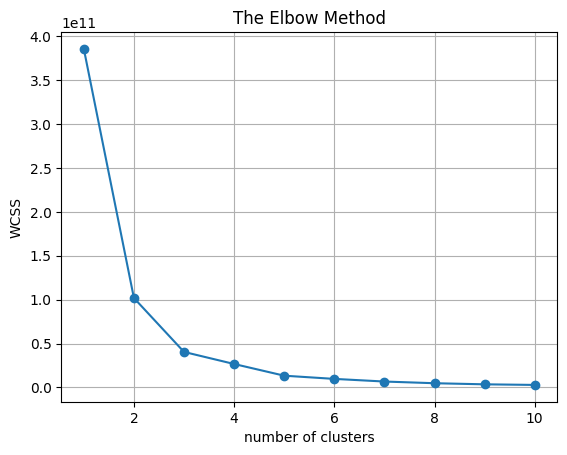

In [9]:
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('number of clusters')
plt.grid(True)
plt.show

In [10]:
kmeansmodel = KMeans(n_clusters = 3, init='k-means++', random_state = 0)

In [11]:
y_kmeans = kmeansmodel.fit_predict(X)

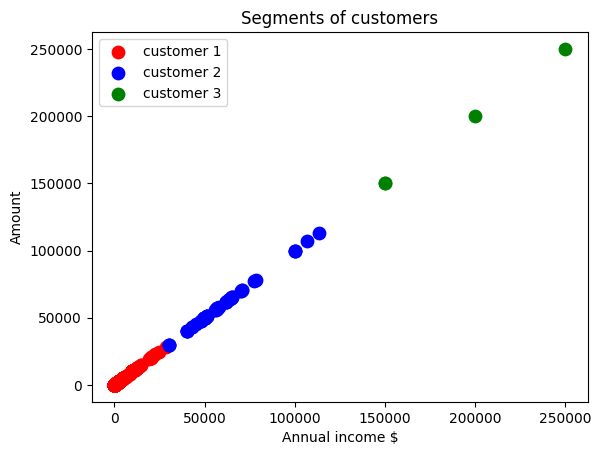

In [12]:
plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0], s=80, c='red', label='customer 1')
plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1], s=80, c='blue', label='customer 2')
plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2], s=80, c='green', label='customer 3')
plt.title("Segments of customers")
plt.xlabel("Annual income $")
plt.ylabel("Amount")
plt.legend()
plt.show()